In [2]:
import pandas as pd
import plotly.express as px

In [3]:
org_data = pd.read_parquet("escooter_history_2022.parquet")

### Datencleaning

In [4]:
org_data_clean = org_data.copy()
org_data_clean.holiday = org_data_clean.holiday.astype(bool)
org_data_clean.workingday = org_data_clean.workingday.astype(bool)
org_data_clean.loc[org_data_clean.temp == 3526.0, "temp"] = org_data_clean.temp.div(100)
org_data_clean.loc[org_data_clean.temp == 3526.0, "temp"] = org_data_clean.temp.div(100)

In [5]:
org_data_clean[org_data_clean.temp > 45].head(5)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer
2138,2020-01-06 10:10:53,False,True,"clear, few clouds",738.0,8.335,43.0,16.9979,True
2139,2020-01-06 10:13:12,False,True,"clear, few clouds",738.0,8.335,43.0,16.9979,False
2140,2020-01-06 10:13:43,False,True,"clear, few clouds",738.0,8.335,43.0,16.9979,True
2141,2020-01-06 10:14:04,False,True,"clear, few clouds",738.0,8.335,43.0,16.9979,True
2142,2020-01-06 10:16:25,False,True,"clear, few clouds",738.0,8.335,43.0,16.9979,True


In [6]:
org_data_clean.loc[org_data_clean.temp >45, "temp"] = org_data_clean.temp.div(100)

### reg_customer

In [7]:
df_rcus = org_data_clean.copy()
df_rcus = df_rcus.groupby(pd.Grouper(key="datetime",freq="D")).agg({"registered_customer": "sum"})
df_rcus

,registered_customer
datetime,
2020-01-04,654
2020-01-05,670
2020-01-06,1229
2020-01-07,1454
2020-01-08,1518
...,...
2021-12-30,4024
2021-12-31,7629
2022-01-01,5293


In [8]:
px.line(df_rcus, x=df_rcus.index, y="registered_customer")

### afg 2 und Dateninkonsistenz

In [9]:
df_afg2 = org_data_clean.copy()

In [10]:
df_afg2 = df_afg2[(df_afg2.holiday==1)&(df_afg2.windspeed>35)&(df_afg2.registered_customer==False)]
df_afg2.to_clipboard()

In [11]:
df_afg2_1 = df_afg2.groupby(pd.Grouper(key="datetime",freq="H")).agg({"temp": "mean", "atemp": "mean", "registered_customer": "count"})
df_afg2_2 = df_afg2_1.dropna()
df_afg2_2

,temp,atemp,registered_customer
datetime,,,
2020-09-07 22:00:00,24.60,27.275,18
2020-11-13 10:00:00,13.12,13.635,38
2020-11-13 13:00:00,15.58,19.695,57
2020-12-28 10:00:00,13.94,14.395,51
2020-12-28 11:00:00,13.94,14.395,43


![alt text](s1.png "Dateninkonsistenz")

In [12]:
d_mistake1 = org_data_clean[((org_data_clean.datetime.between("2020-12-27", "2020-12-29"))&(org_data_clean.temp >30))]
d_mistake1.head(5)


,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer


In [13]:
org_data_clean1 = org_data_clean.copy()

In [14]:
org_data_clean1.loc[org_data_clean1.temp == 1394.0, "temp"] = org_data_clean1.temp.div(100)


### afg2

In [15]:
df_afg2_3 = org_data_clean.copy()

In [16]:
df_afg2_3.head(5)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer
0,2020-01-04 00:00:09,False,False,"clear, few clouds",9.84,14.395,81.0,0.0,True
1,2020-01-04 00:00:41,False,False,"clear, few clouds",9.84,14.395,81.0,0.0,True
2,2020-01-04 00:01:20,False,False,"clear, few clouds",9.84,14.395,81.0,0.0,True
3,2020-01-04 00:04:12,False,False,"clear, few clouds",9.84,14.395,81.0,0.0,True
4,2020-01-04 00:15:19,False,False,"clear, few clouds",9.84,14.395,81.0,0.0,True


In [28]:
df_afg2_4 = df_afg2_3[(df_afg2_3.holiday==1)&(df_afg2_3.windspeed>35)&(df_afg2_3.registered_customer==False)]
df_afg2_5 = df_afg2_4.groupby(pd.Grouper(key="datetime",freq="H")).agg({"temp": "mean", "atemp": "mean", "registered_customer": "count"}).dropna().reset_index()
df_afg2_5


,datetime,temp,atemp,registered_customer
0,2020-09-07 22:00:00,24.60,27.275,18
1,2020-11-13 10:00:00,13.12,13.635,38
2,2020-11-13 13:00:00,15.58,19.695,57
3,2020-12-28 10:00:00,13.94,14.395,51
4,2020-12-28 11:00:00,13.94,14.395,43


In [27]:
df_afg2_5.corr()

,temp,atemp,registered_customer
temp,1.000000,0.967912,-0.775230
atemp,0.967912,1.000000,-0.623625
registered_customer,-0.775230,-0.623625,1.000000


<AxesSubplot:>

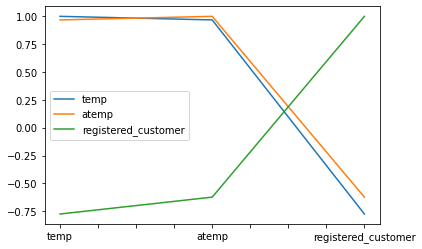

In [19]:
df_afg2_5.corr().plot()

In [30]:
# Atomarität der Spalte weather, Empfehlung Verbesserung

df_weather_corr = df_afg2_3.groupby("weather").agg({"temp": "mean", "atemp": "mean", "registered_customer": "count"})
df_weather_corr.reset_index()

,weather,temp,atemp,registered_customer
0,"clear, few clouds",23.871128,27.534677,2662066
1,"cloudy, mist",21.541641,25.108419,896953
2,heacy rain or thunderstorm or snow or ice pallets,7.762667,10.241375,240
3,light snow or rain or thunderstorm,21.124736,24.556230,196156


In [31]:
df_weather_corr.corr()

,temp,atemp,registered_customer
temp,1.000000,0.999984,0.649592
atemp,0.999984,1.000000,0.649709
registered_customer,0.649592,0.649709,1.000000
